In [115]:
import os
import pandas as pd


def load_berlin_sept_oct_data():
    csv_path = os.path.join(os.getcwd(), "large_output3.txt")
    return pd.read_csv(csv_path)


berlin_data = load_berlin_sept_oct_data()
berlin_data.head()

,provider,session_id,timestamp,traffic_eta_hsp,traffic_eta_flow,base_eta_static,track_duration,dp_score,total_length,local_day_of_week,...,maneuvers_right_turns,maneuvers_uturns,maneuvers_junctions,maneuvers_roundabouts,maneuvers_left_turn_angle_sum,maneuvers_right_turn_angles_sum,total_turn_time,speed_km_h,static_speed_km_h,mean_speed_limit
0,BLITZER,2018-09-09T01:52:37+0200#7a3ae4424ce0a72eaf460...,2018-09-09 00:00:00,1016.0,1037.0,1015.0,966.0,90.974909,8021.0,6.0,...,3.0,2.0,6.0,0.0,-4.538214,3.322941,318.0,47.836679,47.836679,15.298383
1,BLITZER,2018-09-09T01:26:10+0200#d09f48c34cb43e7e3edcf...,2018-09-09 00:00:00,996.0,1133.0,996.0,1172.0,99.111337,7892.0,6.0,...,3.0,0.0,7.0,0.0,-5.293834,4.367389,188.0,37.293588,37.293588,13.839613
2,BLITZER,2018-09-08T15:00:02+0200#c1625b743761fa0a448e1...,2018-09-09 00:00:00,1370.0,1518.0,1369.0,1595.0,98.785425,11136.0,6.0,...,5.0,0.0,8.0,1.0,-4.719984,7.390694,288.0,39.549210,39.549210,13.322158
3,BLITZER,2018-09-09T01:47:59+0200#5a589a4094102384bbe5e...,2018-09-09 00:00:01,1114.0,1176.0,1113.0,1085.0,99.613832,11420.0,6.0,...,3.0,0.0,7.0,1.0,-9.685997,2.936063,165.0,45.080035,45.080035,13.751703
4,BLITZER,2018-09-08T16:20:23+0200#76af5bcd16e4de8978a98...,2018-09-09 00:00:01,2382.0,2495.0,2380.0,1944.0,98.287849,19313.0,6.0,...,8.0,1.0,17.0,0.0,-6.726122,11.389041,533.0,41.065189,41.065189,13.196494


In [116]:
#berlin_data["track_duration"].value_counts()
#berlin_data.describe()
berlin_data.describe()

,traffic_eta_hsp,traffic_eta_flow,base_eta_static,track_duration,dp_score,total_length,local_day_of_week,local_time_of_day,local_month,is_local_holiday,...,maneuvers_right_turns,maneuvers_uturns,maneuvers_junctions,maneuvers_roundabouts,maneuvers_left_turn_angle_sum,maneuvers_right_turn_angles_sum,total_turn_time,speed_km_h,static_speed_km_h,mean_speed_limit
count,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,0.0,...,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000
mean,1531.094115,1693.843910,1411.093597,1713.155631,89.513408,15008.451883,2.229394,46807.348998,9.506494,NaN,...,4.447019,0.168591,7.941922,0.313987,-5.206150,5.696887,248.345375,50.608382,50.608382,15.575281
std,582.217512,645.386122,542.953728,662.096829,15.401175,6758.482926,1.926656,16118.319735,0.499960,NaN,...,2.822083,0.477704,5.017150,0.640206,3.747539,4.124786,119.288043,11.884162,11.884162,3.117016
min,239.000000,241.000000,239.000000,901.000000,0.067333,1946.000000,0.000000,5.000000,9.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,-50.041347,-1.742648,6.000000,18.384592,18.384592,6.106695
25%,1097.000000,1205.000000,1013.000000,1202.000000,88.850738,9987.000000,1.000000,33057.000000,9.000000,NaN,...,2.000000,0.000000,4.000000,0.000000,-7.257329,2.839210,165.000000,42.194871,42.194871,13.485304
50%,1415.000000,1558.000000,1306.000000,1557.000000,95.962884,13836.000000,2.000000,48037.000000,10.000000,NaN,...,4.000000,0.000000,7.000000,0.000000,-4.610096,4.916878,228.000000,46.727794,46.727794,14.353064
75%,1861.000000,2059.000000,1714.000000,2074.000000,98.678390,18770.000000,4.000000,59005.000000,10.000000,NaN,...,6.000000,0.000000,11.000000,0.000000,-2.621439,7.829186,311.000000,56.998332,56.998332,17.102429
max,5161.000000,5468.000000,5155.000000,4499.000000,100.000000,60433.000000,6.000000,86398.000000,10.000000,NaN,...,42.000000,14.000000,59.000000,7.000000,3.011196,66.333381,2229.000000,97.774155,97.774155,41.970362


In [117]:
#Figure out which prediction is best between HSP / ETA Flow and Base ETA Static
actual_vs_historic = berlin_data["track_duration"] - berlin_data["traffic_eta_hsp"]
print("HSP based prediction Average Error:", actual_vs_historic.abs().mean())
print("HSP based prediction Error StdDev:", actual_vs_historic.abs().std())

actual_vs_traffic = berlin_data["track_duration"] - berlin_data["traffic_eta_flow"]
print("Traffic based prediction Average Error:", actual_vs_traffic.abs().mean())
print("Traffic based prediction Error StdDev:", actual_vs_traffic.abs().std())

actual_vs_static = berlin_data["track_duration"] - berlin_data["base_eta_static"]
print("Static speed based prediction Average Error:", actual_vs_static.abs().mean())
print("Static speed based prediction Error StdDev:", actual_vs_static.abs().std())

#Count how often each prediction is best
#temp1 = berlin_data[['track_duration', 'traffic_eta_flow', 'traffic_eta_hsp', 'base_eta_static']].copy()
berlin_data["eta_flow_error"] = berlin_data["track_duration"] - berlin_data["traffic_eta_flow"]
berlin_data["hsp_flow_error"] = berlin_data["track_duration"] - berlin_data["traffic_eta_hsp"]
berlin_data["base_flow_error"] = berlin_data["track_duration"] - berlin_data["base_eta_static"]

berlin_data["abs_eta_flow_error"] = berlin_data["eta_flow_error"].abs()
berlin_data["abs_hsp_flow_error"] = berlin_data["hsp_flow_error"].abs()
berlin_data["abs_base_flow_error"] = berlin_data["base_flow_error"].abs()

berlin_data['lowest_err'] = berlin_data[["abs_eta_flow_error","abs_hsp_flow_error","abs_base_flow_error"]].idxmin(axis=1) #Get column with lowest value (lowest error)
berlin_data['lowest_err'].value_counts()

HSP based prediction Average Error: 256.483173170827
HSP based prediction Error StdDev: 268.4017465911794
Traffic based prediction Average Error: 202.50237313957575
Traffic based prediction Error StdDev: 193.89951639032634
Static speed based prediction Average Error: 338.3994882612602
Static speed based prediction Error StdDev: 326.4180712663029


abs_eta_flow_error     59578
abs_base_flow_error    22051
abs_hsp_flow_error     20767
Name: lowest_err, dtype: int64

Min: Average Error: 147.49874018516348
Min: Error StdDev: 187.69837584620265


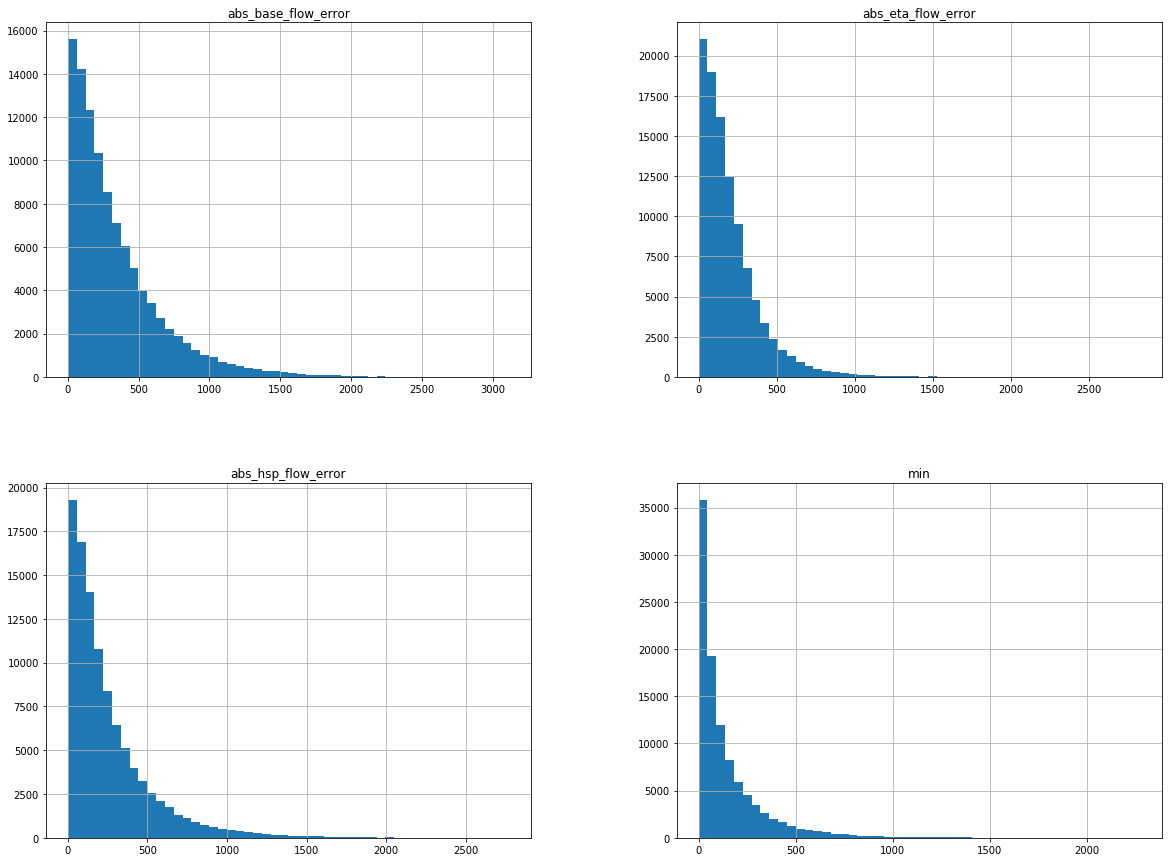

In [118]:
#If we can somehow pick the best prediction each time how good can it be
temp3 = berlin_data[['abs_eta_flow_error', 'abs_hsp_flow_error', 'abs_base_flow_error']].copy()
#Find minimum value
temp3['min'] = temp3.loc[:, ['abs_eta_flow_error', 'abs_hsp_flow_error', 'abs_base_flow_error']].min(axis=1)
print("Min: Average Error:", temp3['min'].mean())
print("Min: Error StdDev:", temp3['min'].std())

%matplotlib inline
import matplotlib.pyplot as plt
temp3.hist(bins=50, figsize=(20,15))
plt.show()

In [119]:
#One Hot Encoding
# Taken from http://www.insightsbot.com/blog/McTKK/python-one-hot-encoding-with-scikit-learn

#OHE of Day of Week
from sklearn.preprocessing import OneHotEncoder
dayofweek_ohe = OneHotEncoder()
X = dayofweek_ohe.fit_transform(berlin_data.local_day_of_week.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["LocalDayOfWeek_"+str(int(i)) for i in range(X.shape[1])])
berlin_data = pd.concat([berlin_data, dfOneHot], axis=1)

#Drop One Hot Encoded Fields
berlin_data.drop(columns=["local_day_of_week"], axis=1, inplace=True)
berlin_data.drop(columns=["day_of_week_sin"], axis=1, inplace=True)
berlin_data.drop(columns=["day_of_week_cos"], axis=1, inplace=True)

/Users/fkelly/Library/Python/3.7/lib/python/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [120]:
#OHE of Time of day into 48 separate 30 minute blocks
timeOfDay = OneHotEncoder()
#berlin_data.loc[:,'local_time_of_day'] /= 30*60 #Divide minutes into 30 minute blocks (48 of them) 
berlin_data['local_time_of_day'] = berlin_data['local_time_of_day'].div(30*60).round(0)
Xt = timeOfDay.fit_transform(berlin_data.local_time_of_day.values.reshape(-1,1)).toarray()
dfOneHotTime = pd.DataFrame(Xt, columns = ["LocalTimeOfDay_"+str(int(i)) for i in range(Xt.shape[1])])
berlin_data = pd.concat([berlin_data, dfOneHotTime], axis=1)

#Drop One Hot Encoded Fields
berlin_data.drop(columns=["local_time_of_day"], axis=1, inplace=True)
berlin_data.drop(columns=["time_of_day_sin"], axis=1, inplace=True)
berlin_data.drop(columns=["time_of_day_cos"], axis=1, inplace=True)



/Users/fkelly/Library/Python/3.7/lib/python/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [121]:
#OHE of Output classification
#columns_to_encode = ['lowest_err']
#ohe    = OneHotEncoder(sparse=False)
#encoded_columns = ohe.fit_transform(berlin_data[columns_to_encode])
#dfOutputLabels = pd.DataFrame(encoded_columns, columns = ["Label_"+str(i) for i in range(encoded_columns.shape[1])])
#dfOutputLabels.describe()
#berlin_data = pd.concat([berlin_data, dfOutputLabels], axis=1)

berlin_data = pd.get_dummies(berlin_data, columns=['lowest_err'])

#Drop One Hot Encoded Fields
berlin_data.drop(columns=["eta_flow_error"], axis=1, inplace=True)
berlin_data.drop(columns=["hsp_flow_error"], axis=1, inplace=True)
berlin_data.drop(columns=["base_flow_error"], axis=1, inplace=True)
berlin_data.drop(columns=["abs_eta_flow_error"], axis=1, inplace=True)
berlin_data.drop(columns=["abs_hsp_flow_error"], axis=1, inplace=True)
berlin_data.drop(columns=["abs_base_flow_error"], axis=1, inplace=True)

berlin_data.describe()

,traffic_eta_hsp,traffic_eta_flow,base_eta_static,track_duration,dp_score,total_length,local_month,is_local_holiday,start_lat,start_lon,...,LocalTimeOfDay_42,LocalTimeOfDay_43,LocalTimeOfDay_44,LocalTimeOfDay_45,LocalTimeOfDay_46,LocalTimeOfDay_47,LocalTimeOfDay_48,lowest_err_abs_base_flow_error,lowest_err_abs_eta_flow_error,lowest_err_abs_hsp_flow_error
count,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,0.0,102396.000000,102396.000000,...,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000
mean,1531.094115,1693.843910,1411.093597,1713.155631,89.513408,15008.451883,9.506494,NaN,52.503484,13.397561,...,0.008379,0.006895,0.005752,0.005166,0.003994,0.003193,0.001338,0.215350,0.581839,0.202811
std,582.217512,645.386122,542.953728,662.096829,15.401175,6758.482926,0.499960,NaN,0.059266,0.124600,...,0.091154,0.082749,0.075625,0.071691,0.063074,0.056421,0.036554,0.411067,0.493259,0.402095
min,239.000000,241.000000,239.000000,901.000000,0.067333,1946.000000,9.000000,NaN,52.342425,13.090210,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1097.000000,1205.000000,1013.000000,1202.000000,88.850738,9987.000000,9.000000,NaN,52.460734,13.315398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1415.000000,1558.000000,1306.000000,1557.000000,95.962884,13836.000000,10.000000,NaN,52.509963,13.400360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1861.000000,2059.000000,1714.000000,2074.000000,98.678390,18770.000000,10.000000,NaN,52.541432,13.496023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5161.000000,5468.000000,5155.000000,4499.000000,100.000000,60433.000000,10.000000,NaN,52.659953,13.756909,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


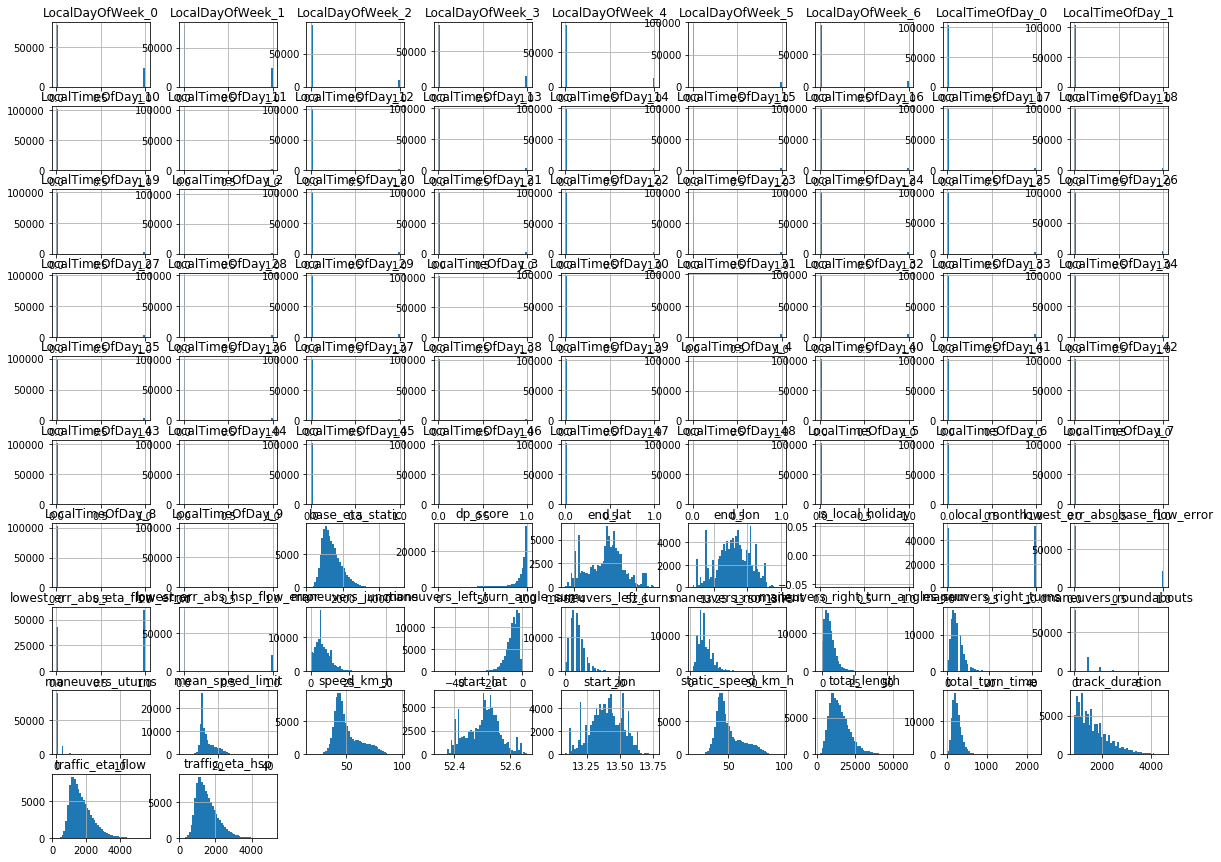

In [122]:
berlin_data.hist(bins=50, figsize=(20,15))
plt.show()

In [123]:
#Data Cleaning - Remove non-floats
berlin_data.drop(columns=["provider"], axis=1, inplace=True)
berlin_data.drop(columns=["session_id"], axis=1, inplace=True)
berlin_data.drop(columns=["timestamp"], axis=1, inplace=True)
berlin_data.drop(columns=["is_local_holiday"], axis=1, inplace=True)

#Remove prior predictions
#berlin_data.drop(columns=["traffic_eta_hsp"], axis=1, inplace=True)
#berlin_data.drop(columns=["traffic_eta_flow"], axis=1, inplace=True)
#berlin_data.drop(columns=["base_eta_static"], axis=1, inplace=True)

#Remove rows where dp_score is below threshold
print("Len Before: ", len(berlin_data))
berlin_data = berlin_data.drop(berlin_data[berlin_data.dp_score < 80].index)
print("Len After: ", len(berlin_data))

#Remove probably useless variables
#berlin_data.drop(columns=["local_month"], axis=1, inplace=True)
berlin_data.drop(columns=["start_lat"], axis=1, inplace=True)
berlin_data.drop(columns=["start_lon"], axis=1, inplace=True)
berlin_data.drop(columns=["end_lat"], axis=1, inplace=True)
berlin_data.drop(columns=["end_lon"], axis=1, inplace=True)

corr_matrix = berlin_data.corr()
corr_matrix["track_duration"].sort_values(ascending=False)

Len Before:  102396
Len After:  85644


track_duration                     1.000000
traffic_eta_flow                   0.916917
traffic_eta_hsp                    0.878677
base_eta_static                    0.844112
total_length                       0.737097
total_turn_time                    0.653327
maneuvers_non_silent               0.534737
maneuvers_left_turns               0.468012
maneuvers_junctions                0.446483
maneuvers_right_turns              0.441595
maneuvers_right_turn_angles_sum    0.390972
maneuvers_roundabouts              0.225215
lowest_err_abs_eta_flow_error      0.186858
maneuvers_uturns                   0.094961
LocalDayOfWeek_1                   0.045752
LocalTimeOfDay_16                  0.042565
speed_km_h                         0.041864
static_speed_km_h                  0.041864
LocalDayOfWeek_0                   0.036585
mean_speed_limit                   0.030538
LocalTimeOfDay_14                  0.029447
LocalTimeOfDay_32                  0.029095
LocalTimeOfDay_30               

In [124]:
#Create the Test Set, Training Set split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(berlin_data, test_size=0.2, random_state=37)

print("Training Set Size ", len(train_set))
print("Test Set Size ", len(test_set))

Training Set Size  68515
Test Set Size  17129


In [125]:
# Data Cleaning - drop the "ground truth" actual duration
berlin_train_labels = train_set[["lowest_err_abs_eta_flow_error","lowest_err_abs_hsp_flow_error",
                           "lowest_err_abs_base_flow_error"]].copy()
train_set.drop(columns=["lowest_err_abs_eta_flow_error"], axis=1, inplace=True)
train_set.drop(columns=["lowest_err_abs_hsp_flow_error"], axis=1, inplace=True)
train_set.drop(columns=["lowest_err_abs_base_flow_error"], axis=1, inplace=True)

berlin_test_labels = test_set[["lowest_err_abs_eta_flow_error","lowest_err_abs_hsp_flow_error",
                           "lowest_err_abs_base_flow_error"]].copy()
test_set.drop(columns=["lowest_err_abs_eta_flow_error"], axis=1, inplace=True)
test_set.drop(columns=["lowest_err_abs_hsp_flow_error"], axis=1, inplace=True)
test_set.drop(columns=["lowest_err_abs_base_flow_error"], axis=1, inplace=True)

#Use Standard scaling: Centering around and scaling happen independently on each feature
# Scaling to unit variance

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

#We only want to scale certain features - definitely not the One-hot encoded ones
ct = ColumnTransformer([
        ('somename', StandardScaler(), ['traffic_eta_hsp', 'traffic_eta_flow', 'base_eta_static',
                                        'dp_score', 'total_length',
                                        'maneuvers_non_silent','maneuvers_left_turns','maneuvers_right_turns', 
                                        'maneuvers_uturns', 'maneuvers_junctions', 'maneuvers_roundabouts',
                                        'maneuvers_left_turn_angle_sum', 'maneuvers_right_turn_angles_sum',
                                        'total_turn_time', 'speed_km_h', 'static_speed_km_h', 'mean_speed_limit'])
    ], remainder='passthrough')

berlin_data_scaled = ct.fit_transform(train_set)
#Add back columns
berlin_data_scaled_df = pd.DataFrame(berlin_data_scaled, columns = train_set.columns)
#berlin_data_scaled_df.head()

# As per Standard operating procedure we do NOT scale the test data

/usr/local/lib/python3.7/site-packages/pandas-0.23.4-py3.7-macosx-10.13-x86_64.egg/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [126]:
#Nearest Neighbors

from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())   
    
#Probably needs to have scaled test inputs?
from sklearn.neighbors import KNeighborsClassifier
nn_clf = KNeighborsClassifier(n_neighbors=5)
nn_clf.fit(berlin_data_scaled_df, berlin_train_labels) 
nn_scores = cross_val_score(nn_clf, test_set, berlin_test_labels, cv=10)
display_scores(nn_scores)  

Scores:  [0.76649154 0.7915937  0.77408056 0.80035026 0.75773497 0.76649154
 0.76007005 0.78108581 0.77875073 0.75759346]
Mean:  0.7734242611475741
Standard Deviation:  0.013834261111102147


In [127]:
#Support Vectors
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
svm_clf = OneVsRestClassifier(LinearSVC(random_state=0, max_iter=500)).fit(berlin_data_scaled_df, berlin_train_labels)
svm_scores =cross_val_score(svm_clf, test_set, berlin_test_labels, cv=10)
display_scores(svm_scores) 

/Users/fkelly/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/fkelly/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/fkelly/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/fkelly/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/fkelly/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to c

Scores:  [0.72621133 0.36719206 0.72796264 0.33566842 0.67892586 0.36485698
 0.29655575 0.73088149 0.54582604 0.66179907]
Mean:  0.5435879625840876
Standard Deviation:  0.17379157981136095


/Users/fkelly/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [128]:
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

tree_classifier = tree.DecisionTreeClassifier()
tree_classifier = tree_classifier.fit(berlin_data_scaled_df, berlin_train_labels)
berlin_train_predictions = tree_classifier.predict(berlin_data_scaled_df)
train_error = mean_absolute_error(berlin_train_labels, berlin_train_predictions)
print("Tree Classification MAE on Training Set: ", train_error)

berlin_test_predictions = tree_classifier.predict(test_set)
test_error = mean_absolute_error(berlin_test_labels, berlin_test_predictions)
print("Tree Classification MAE on Test Set: ", error)

tree_scores = cross_val_score(tree_classifier, test_set, berlin_test_labels, cv=10)
display_scores(tree_scores)

Tree Classification MAE on Training Set:  0.0
Tree Classification MAE on Test Set:  0.0
Scores:  [0.88499708 0.87507297 0.8744892  0.88674839 0.86923526 0.87565674
 0.88032691 0.87915937 0.86865149 0.8796729 ]
Mean:  0.8774010316927727
Standard Deviation:  0.005675055659906469


In [129]:
#Ensembles of Decision Trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
random_forest_scores = cross_val_score(clf, test_set, berlin_test_labels, cv=10)
display_scores(random_forest_scores)                              

clf = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
extra_trees_scores = cross_val_score(clf, test_set, berlin_test_labels, cv=10)
display_scores(extra_trees_scores)  

Scores:  [0.68359603 0.69352014 0.68476357 0.6923526  0.65674256 0.66316404
 0.66316404 0.67834209 0.66666667 0.66238318]
Mean:  0.6744694911370444
Standard Deviation:  0.012898935189364519
Scores:  [0.61412726 0.62463514 0.61821366 0.62113252 0.5890251  0.5890251
 0.58844133 0.60595447 0.58318739 0.58469626]
Mean:  0.6018438234828769
Standard Deviation:  0.015740448251720524


In [130]:
score_list = []
score_list.append(("k-Nearest Neighbors", nn_scores.mean()))
score_list.append(("Plain Decision Tree", tree_scores.mean()))
score_list.append(("Random Forest", random_forest_scores.mean()))
score_list.append(("Extra Trees", extra_trees_scores.mean()))


from operator import itemgetter
score_list.sort(key=itemgetter(1))

print(score_list)

[('Extra Trees', 0.6018438234828769), ('Random Forest', 0.6744694911370444), ('k-Nearest Neighbors', 0.7734242611475741), ('Plain Decision Tree', 0.8774010316927727)]


In [131]:
# TODO

# 1) Show DT "feature_importances_"
# 2) Plot learning curves
# 3) Add regularization to linear model

# 3) Add other data - the vectors?
# 4) How to use lat / lon ?

# Idea - are there times that one prediction Traffic vs. HSP vs. Static is better than the other?
# If so train a classifer to choose OR "aggregate" the predictions

#Idea - cluster road segment links by some unsupervised "classification"?